<a href="https://colab.research.google.com/github/WennyLuu/Project/blob/main/TimeSeriesProject2_MSFTStockPriceForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Project

## **Project demo - Please don't copy this project**

In this project, we use Time Series models



Objective:

How to analyze time series data ?

How to forecast time series data?

#Project 2: MSFT stock price forecast

## Part 0: Setup Google Drive Environment



In [ ]:
#import pandas as pd
#import numpy as np

from tabulate import tabulate

link = 'https://drive.google.com/open?id=1wdf3FfKdR_xNh2rJeYWL4ye0_FUZ9WM7'


fluff, id = link.split('=')
file = drive.CreateFile({'id':id})
file.GetContentFile('MSFT_Stock.csv')
microsoft  = pd.read_csv('MSFT_Stock.csv', index_col='Date', parse_dates=['Date'])
Nathan_TS_Monthly_df   = pd.read_csv('MSFT_Stock.csv')
microsoft.head()


,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
import matplotlib.pyplot as plt
Nathan_TS_df = microsoft


# Part 1: Data Exploration

#1.1 Understand the Raw Dataset

In [ ]:
Nathan_TS_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
# check data info
Nathan_TS_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [ ]:
#check the unique values for each column
Nathan_TS_df.nunique()

,0
Open,1409
High,1400
Low,1397
Close,1398
Volume,1511


In [ ]:
# check missing values
Nathan_TS_df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


#1.2 EDA
## EDA ensures that results are valid and applicable as per the business goals. It can be used to identify data errors and outliers,  

### Once the EDA task is completed, its features can be used for efficient and better data analysis, modelling, and machine learning.

#### Homework: <font color="red">*`What information you will get from EDA? `* <font>

---





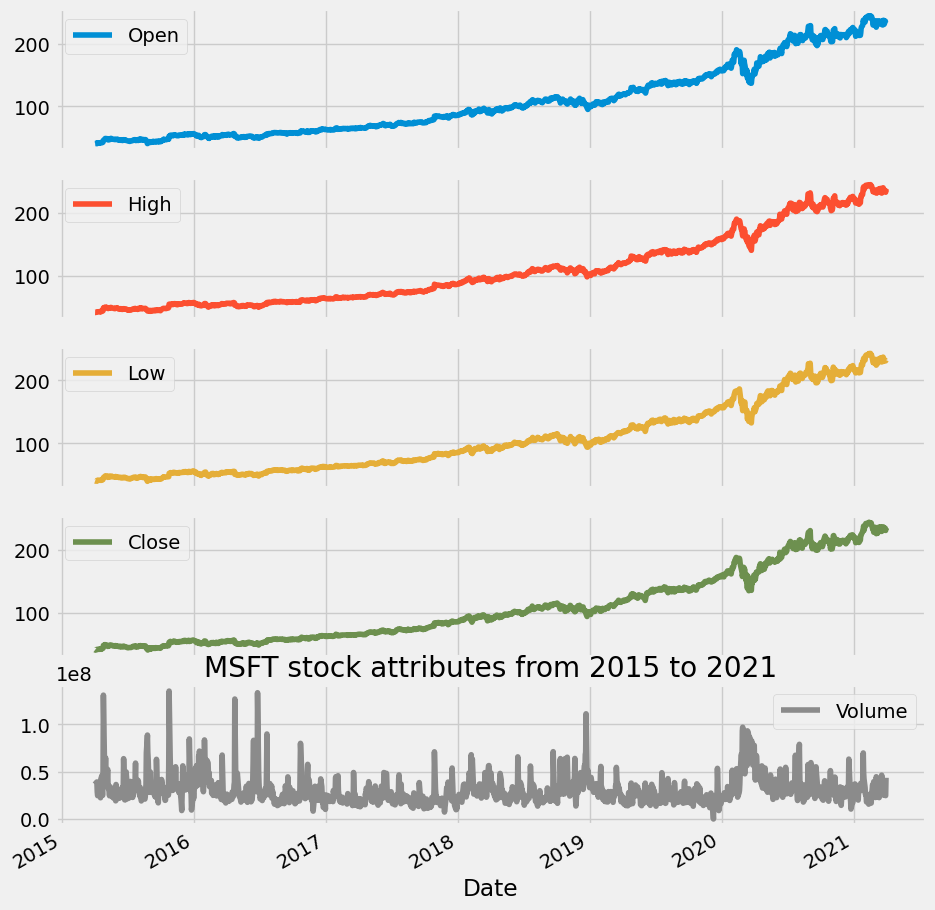

In [ ]:
Nathan_TS_df['2015':'2021'].plot(subplots=True, figsize=(10,12))
plt.title('MSFT stock attributes from 2015 to 2021')
plt.savefig('stocks.png')

<Axes: xlabel='Date'>

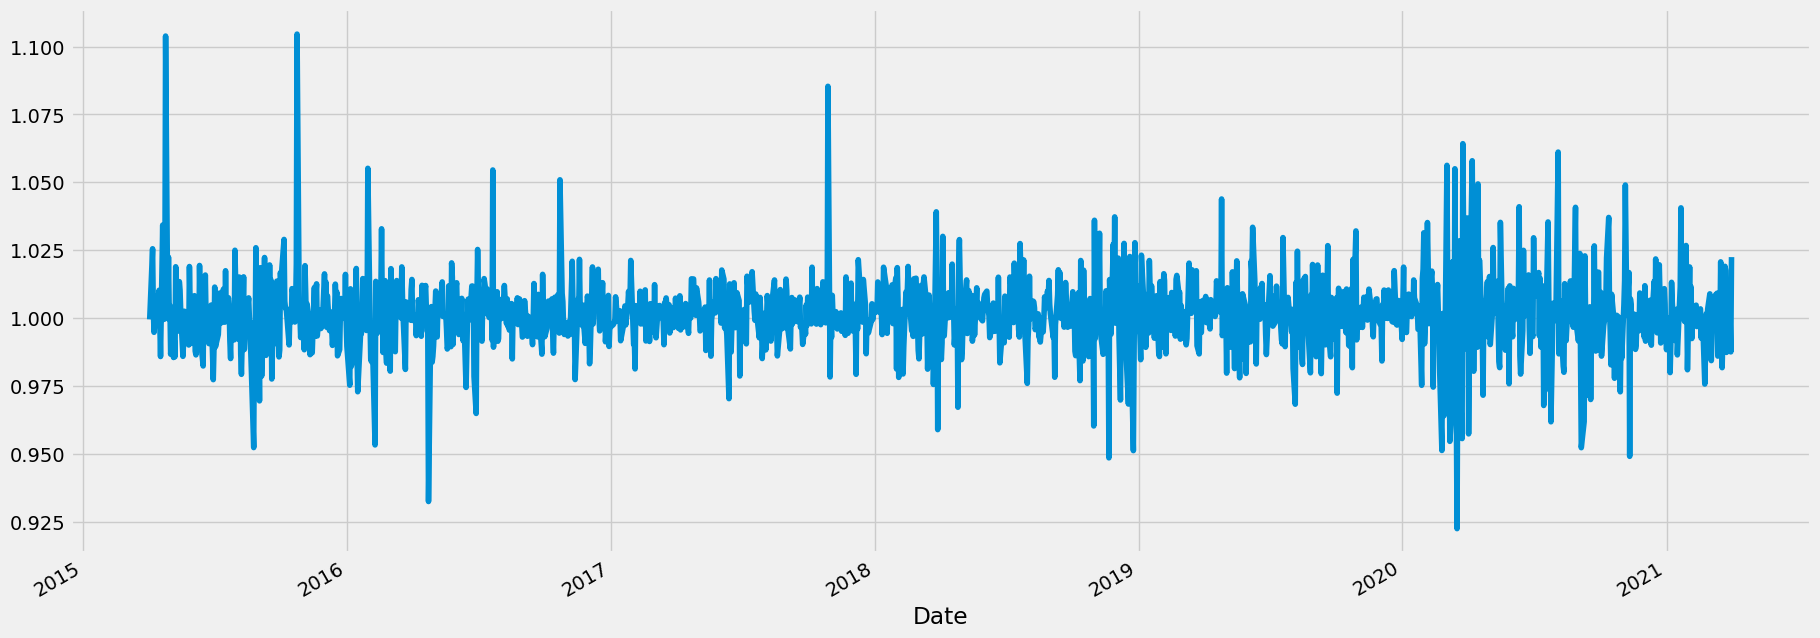

In [ ]:
Nathan_TS_df['Change'] = Nathan_TS_df.High.div(Nathan_TS_df.High.shift())
Nathan_TS_df['Change'].plot(figsize=(20,8))



<Axes: xlabel='Date'>

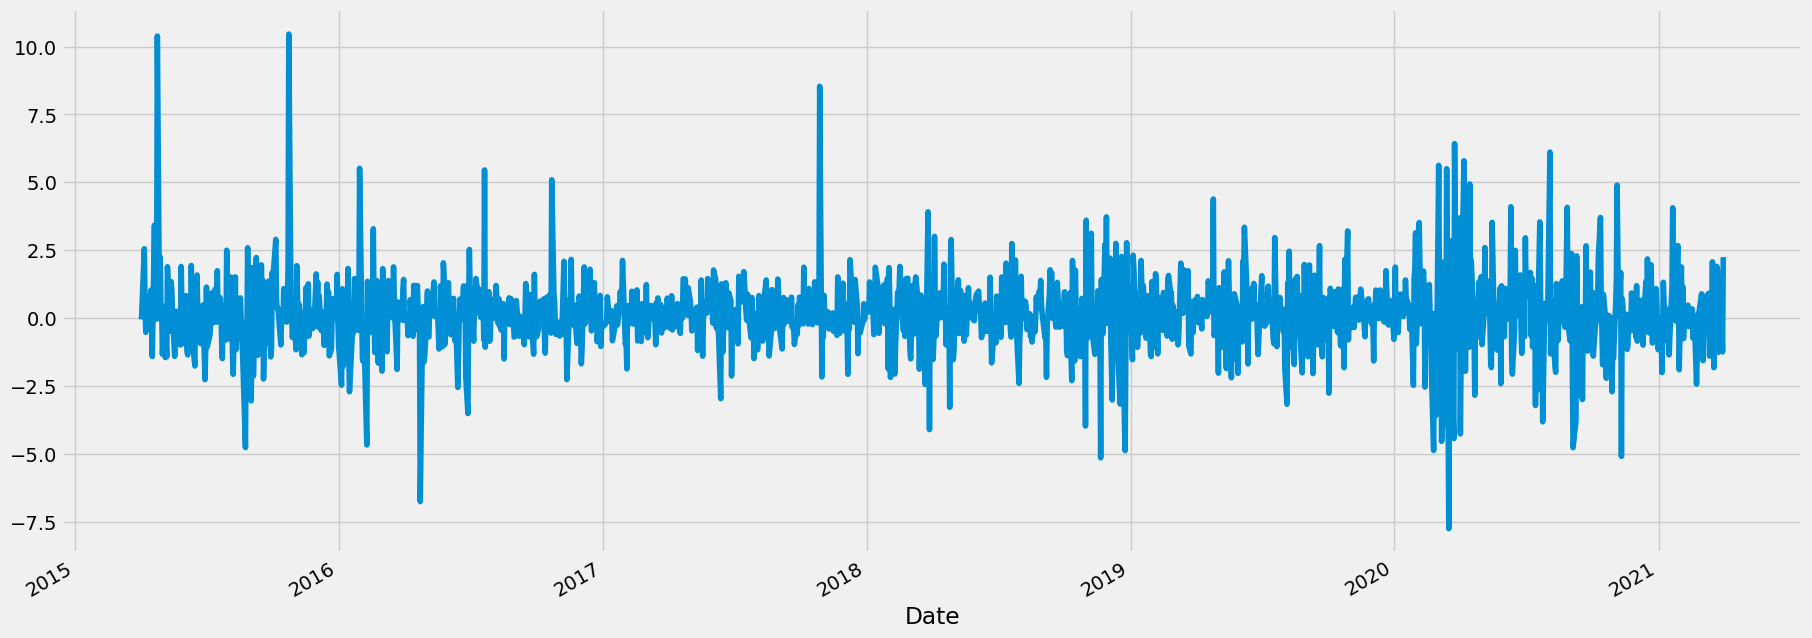

In [ ]:
Nathan_TS_df['Return'] = Nathan_TS_df.Change.sub(1).mul(100)
Nathan_TS_df['Return'].plot(figsize=(20,8))

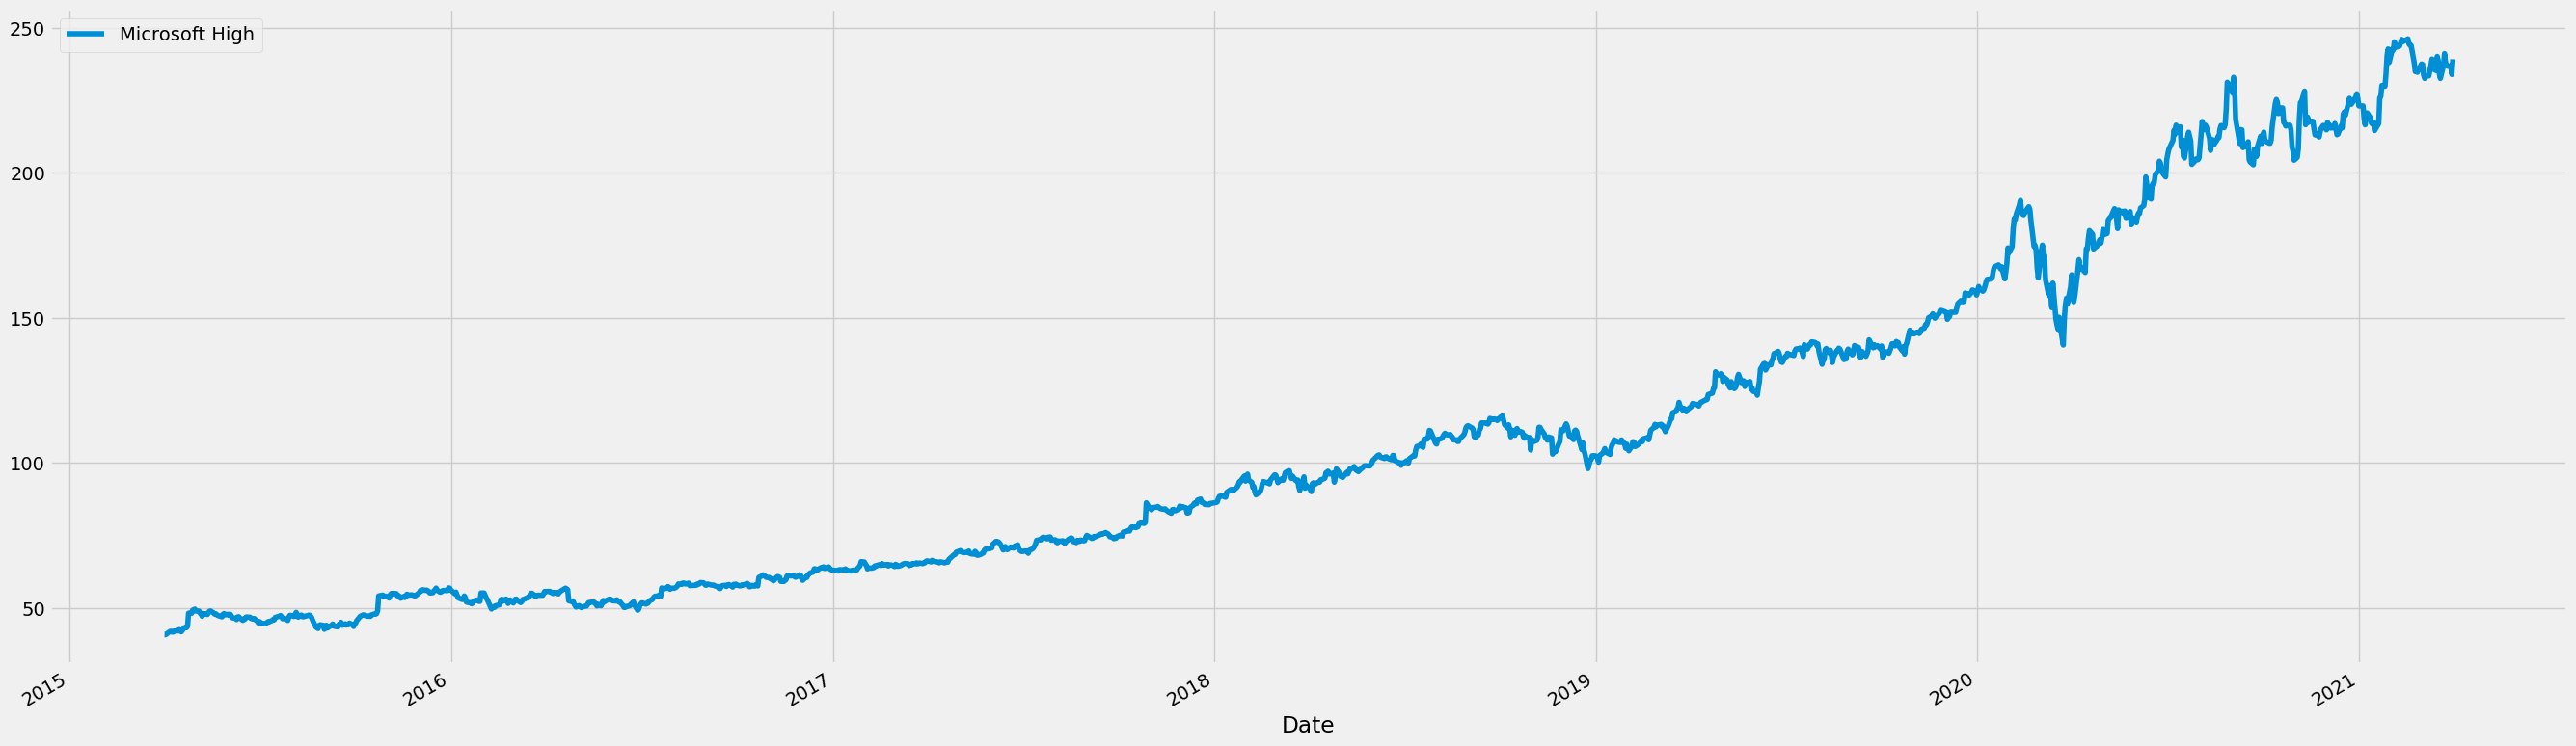

In [ ]:
Nathan_TS_df.High.plot()
#Nathan_TS_df.Low.plot()
plt.legend(['Microsoft High'])

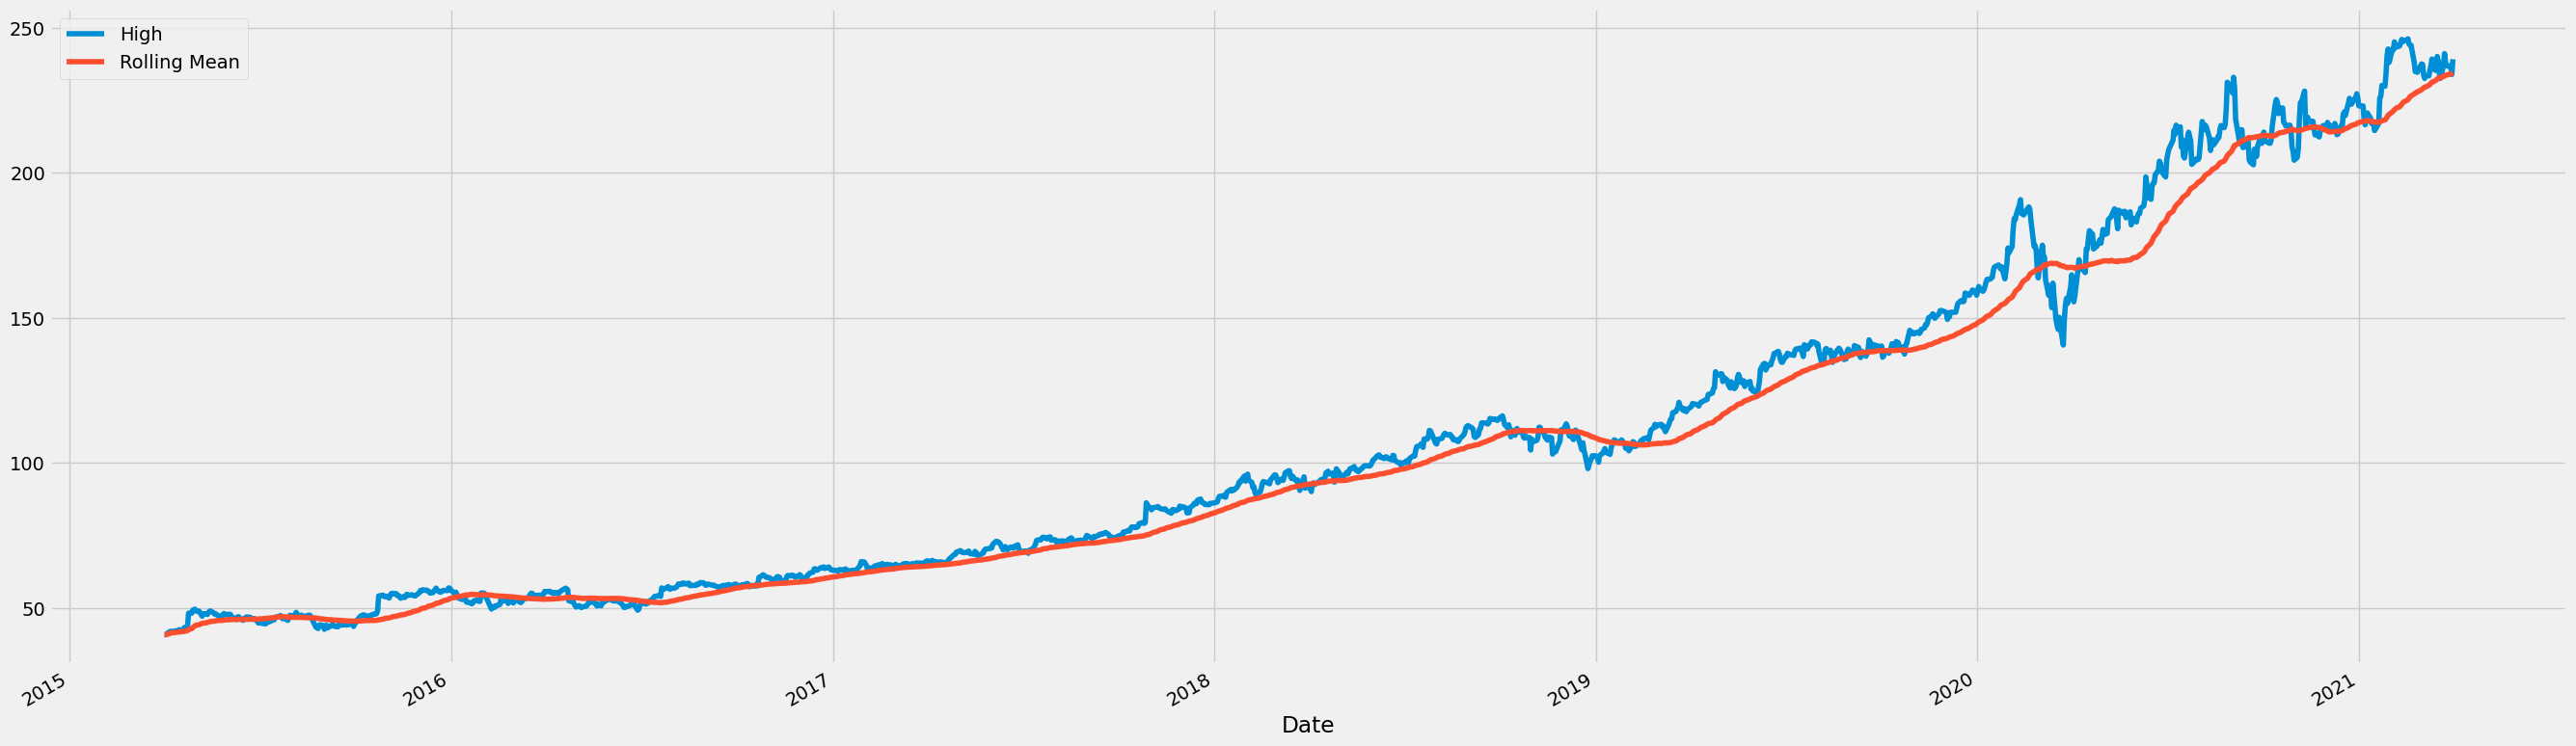

In [ ]:
rolling_MSFT = Nathan_TS_df.High.rolling('90D').mean()
Nathan_TS_df.High.plot()
rolling_MSFT.plot()

plt.legend(['High','Rolling Mean'])

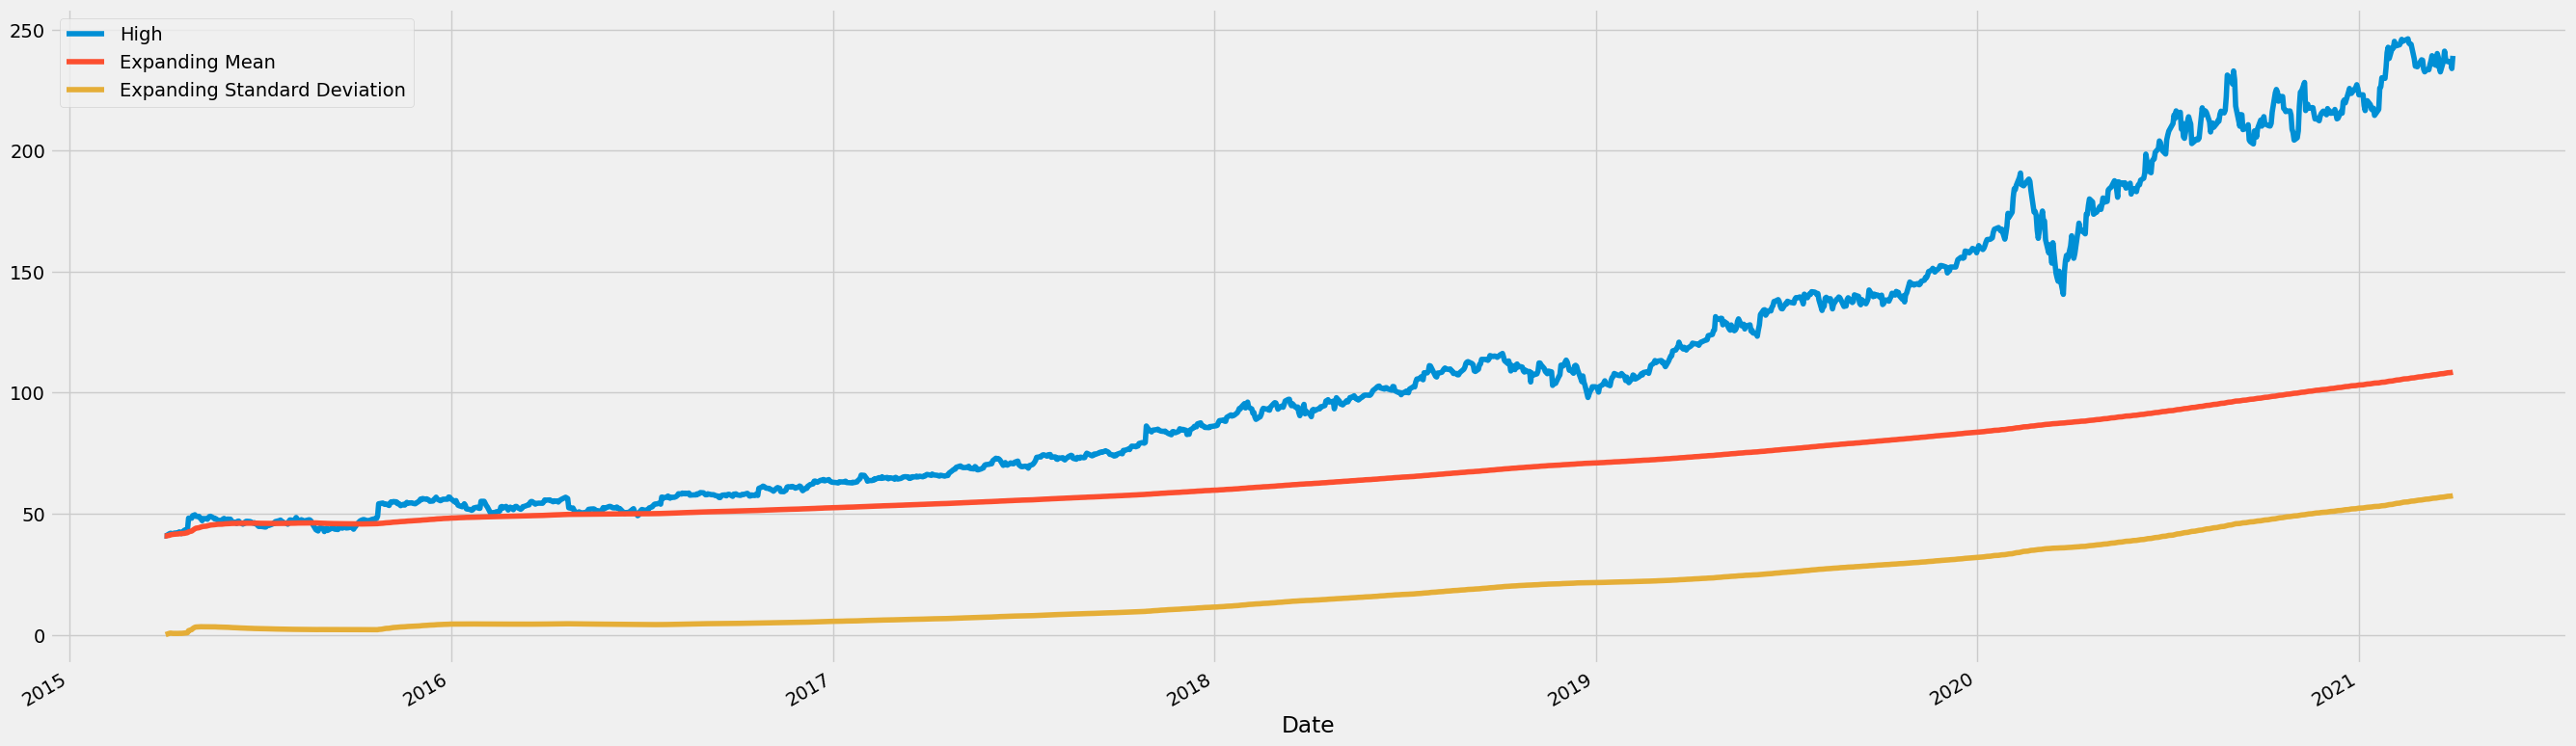

In [ ]:
microsoft_mean = Nathan_TS_df.High.expanding().mean()
microsoft_std = Nathan_TS_df.High.expanding().std()
Nathan_TS_df.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])

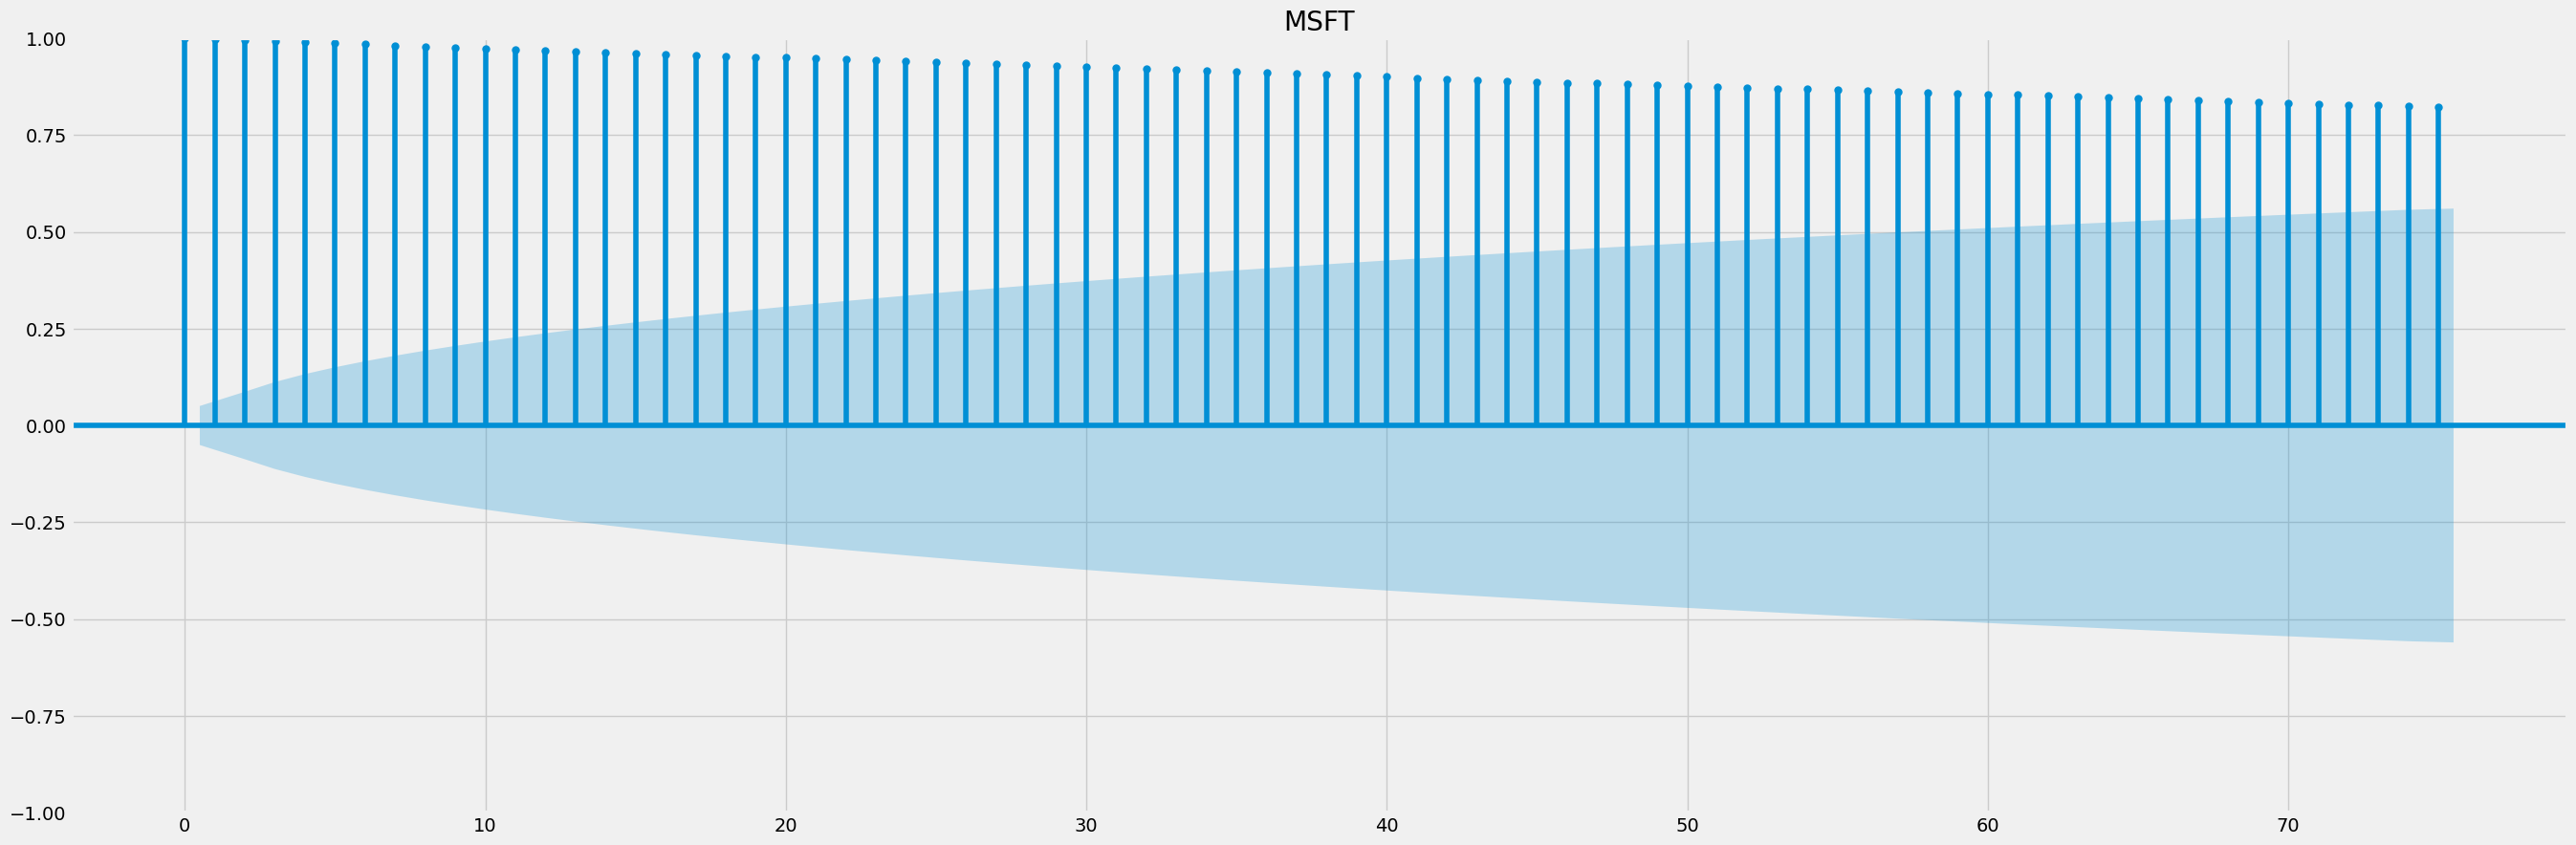

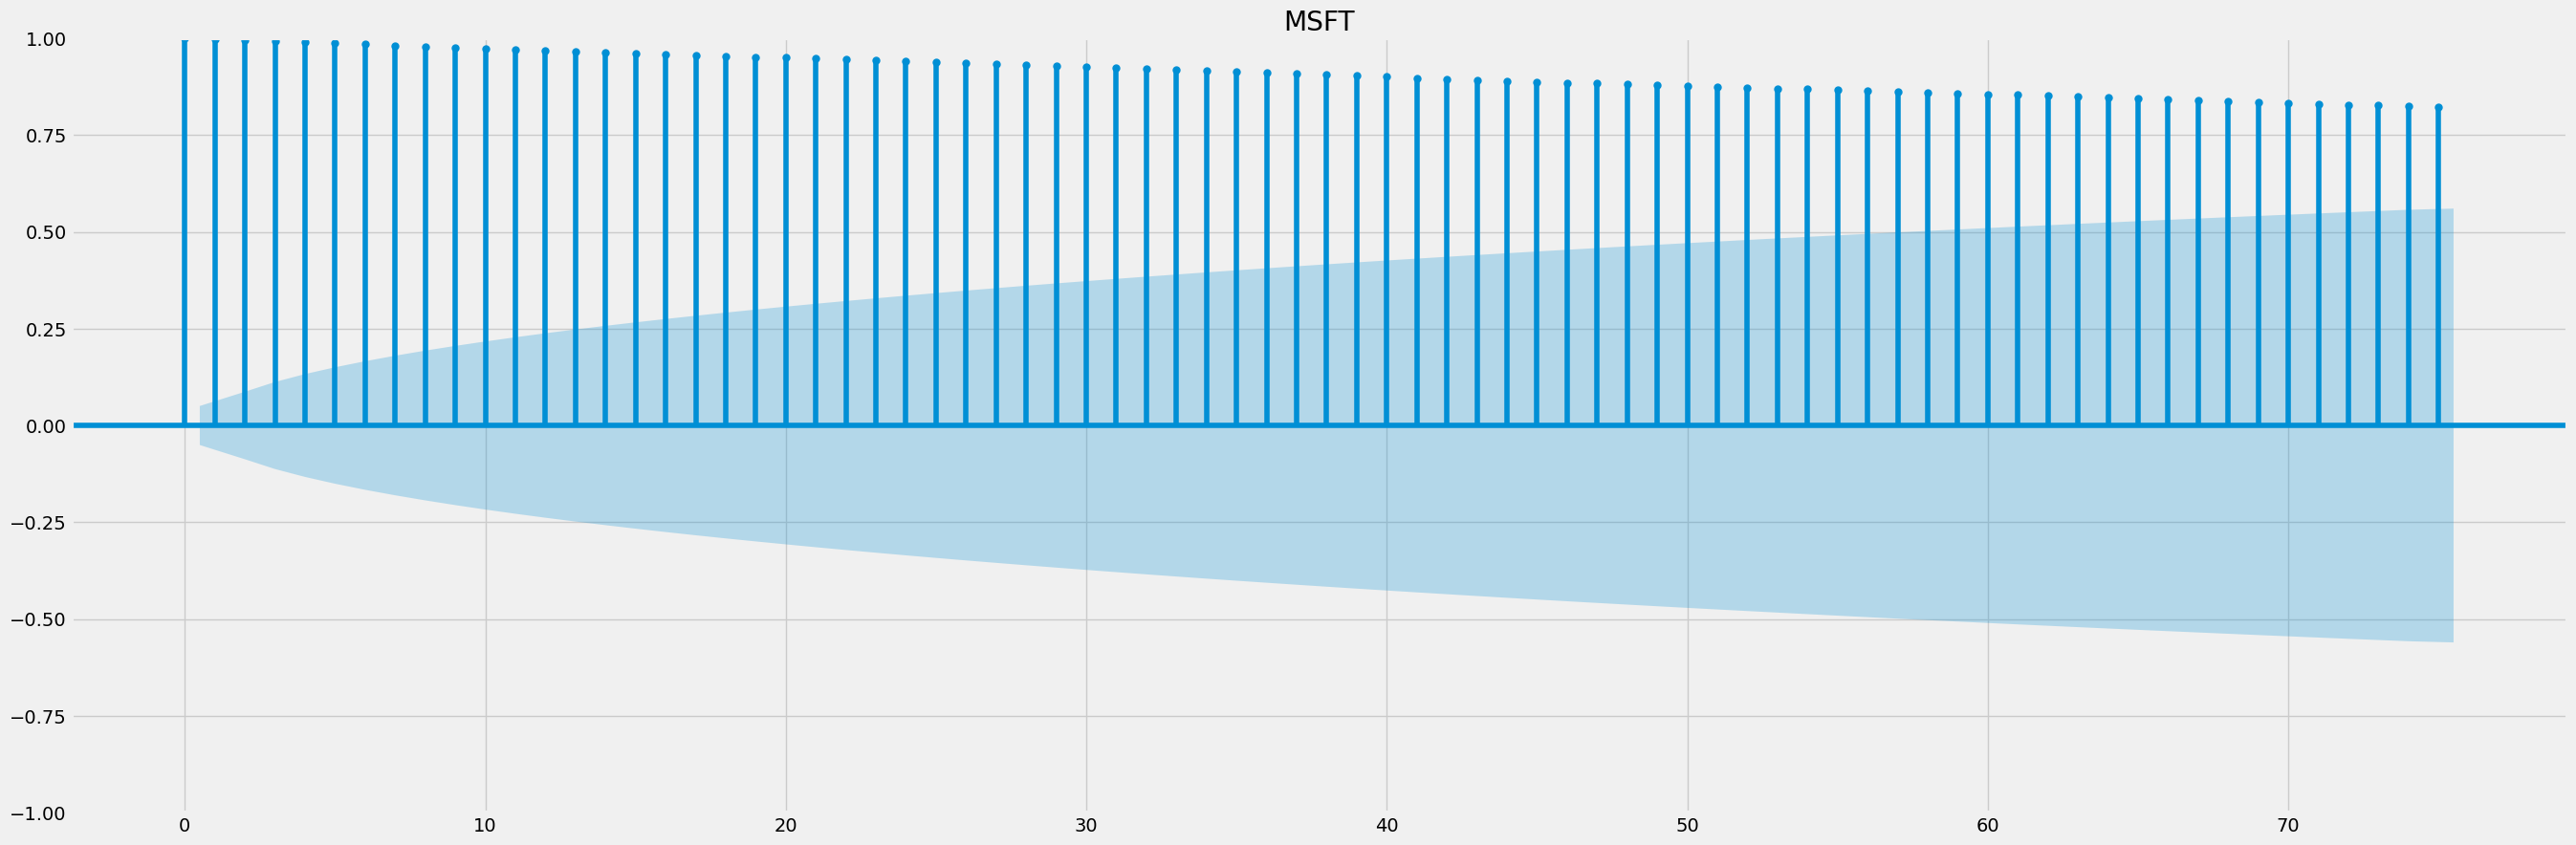

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Nathan_TS_df["High"],lags=75,title="MSFT")

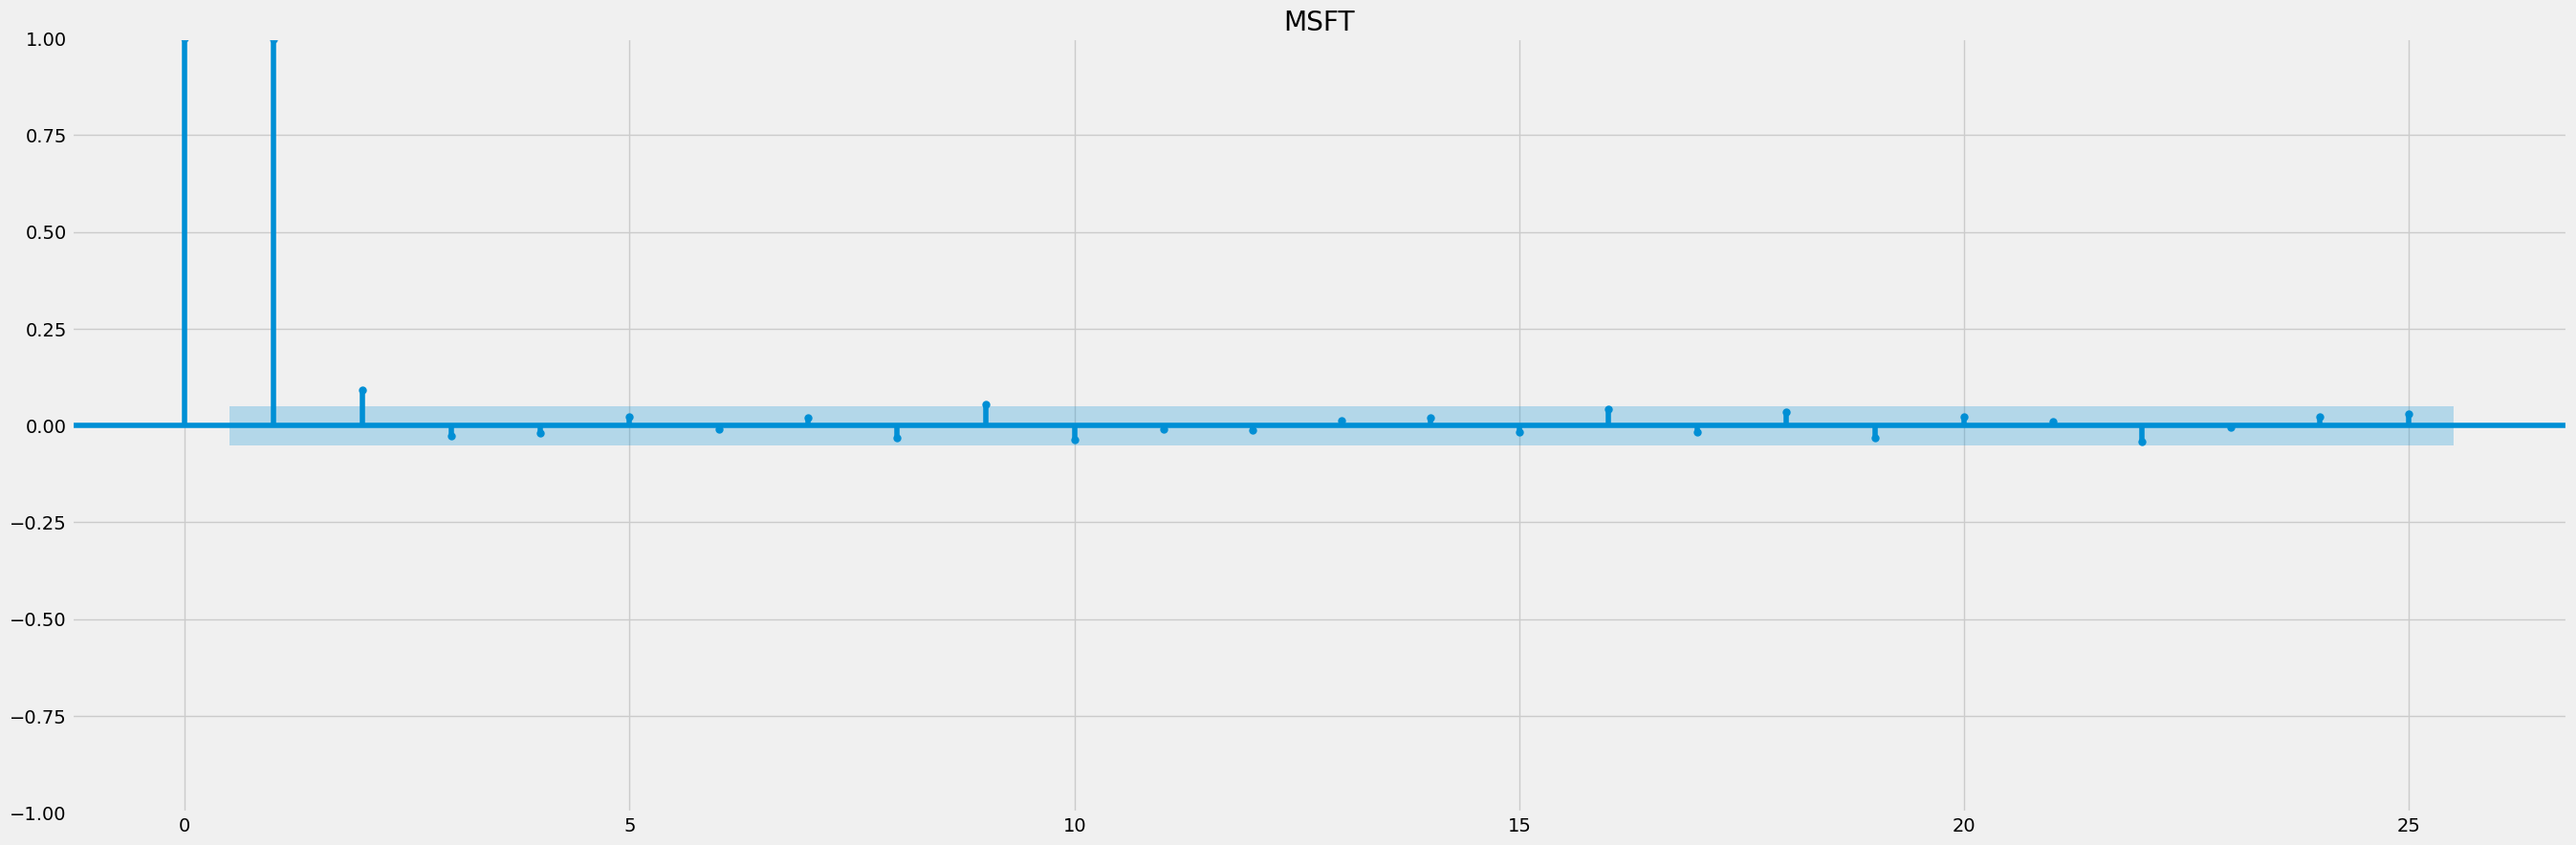

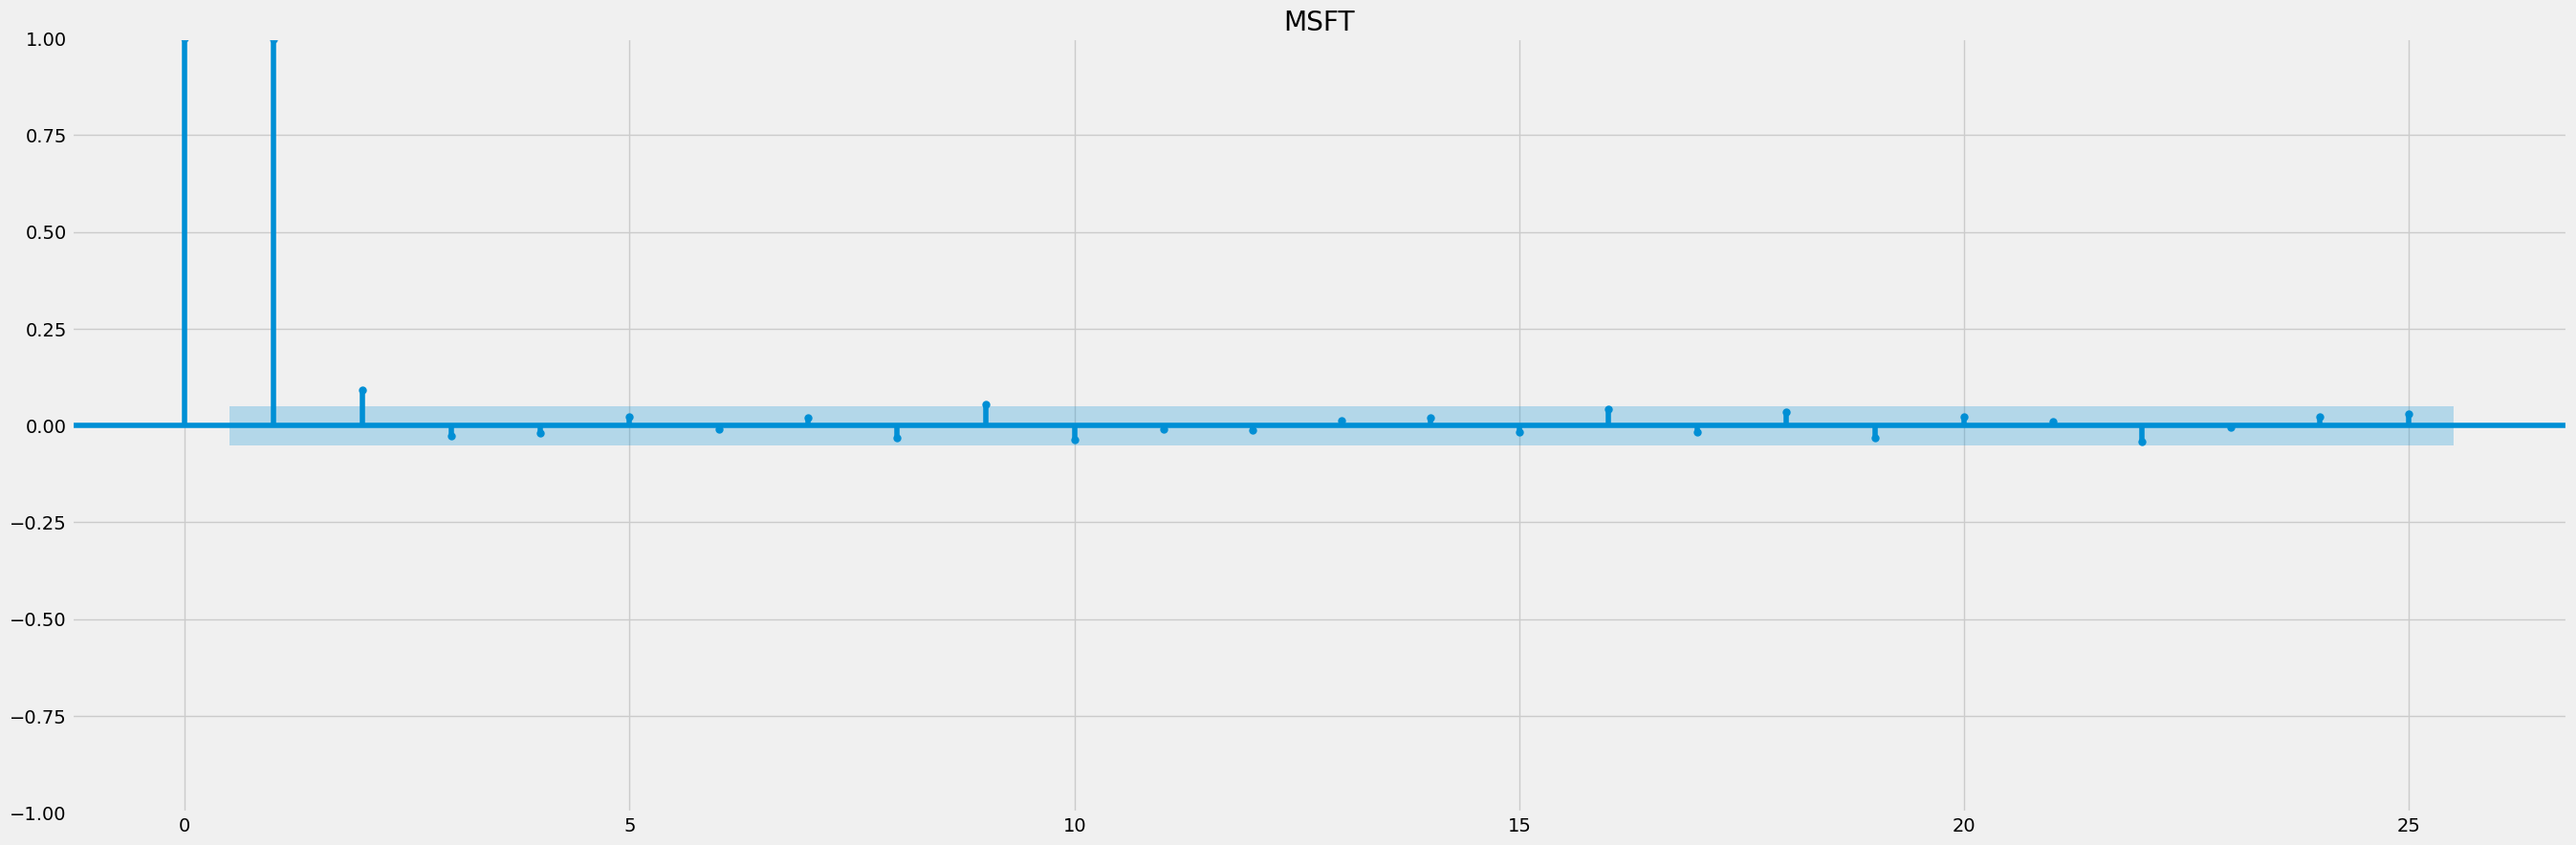

In [ ]:
plot_pacf(Nathan_TS_df["Close"],lags=25,title="MSFT")

In [ ]:


Nathan_TS_Monthly_df['dateN']=pd.to_datetime(Nathan_TS_Monthly_df['Date'])

Nathan_TS_Monthly_df.set_index('dateN',inplace=True)

Nathan_TS_Monthly_df.head()

,Date,Open,High,Low,Close,Volume
dateN,,,,,,
2015-04-01 16:00:00,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


<Axes: xlabel='dateN'>

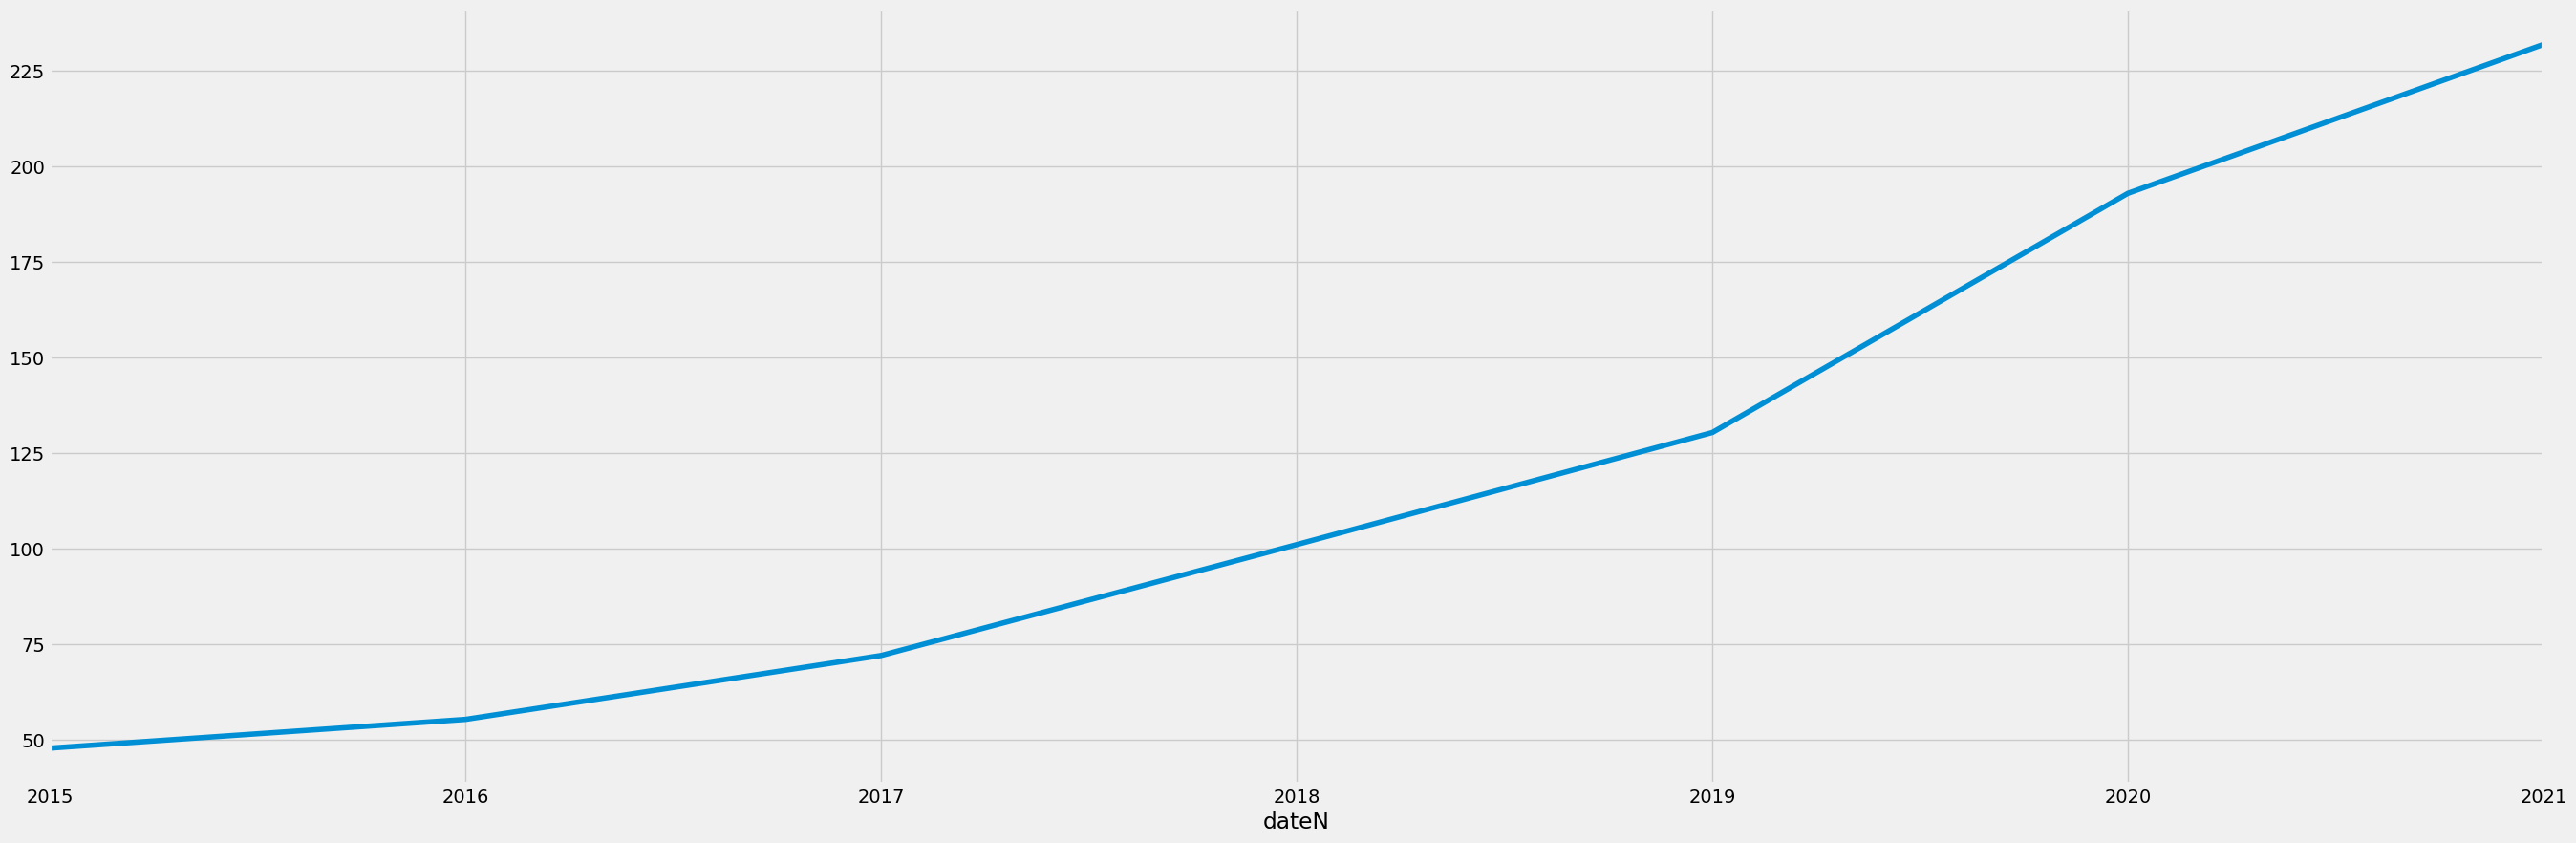

In [ ]:
Nathan_TS_Monthly_df['Close'].resample('Y').mean().plot()

In [ ]:
Nathan_TS_Monthly_df.describe()


,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


# Part 2: Data cleaning and feature analysis


## Data Description

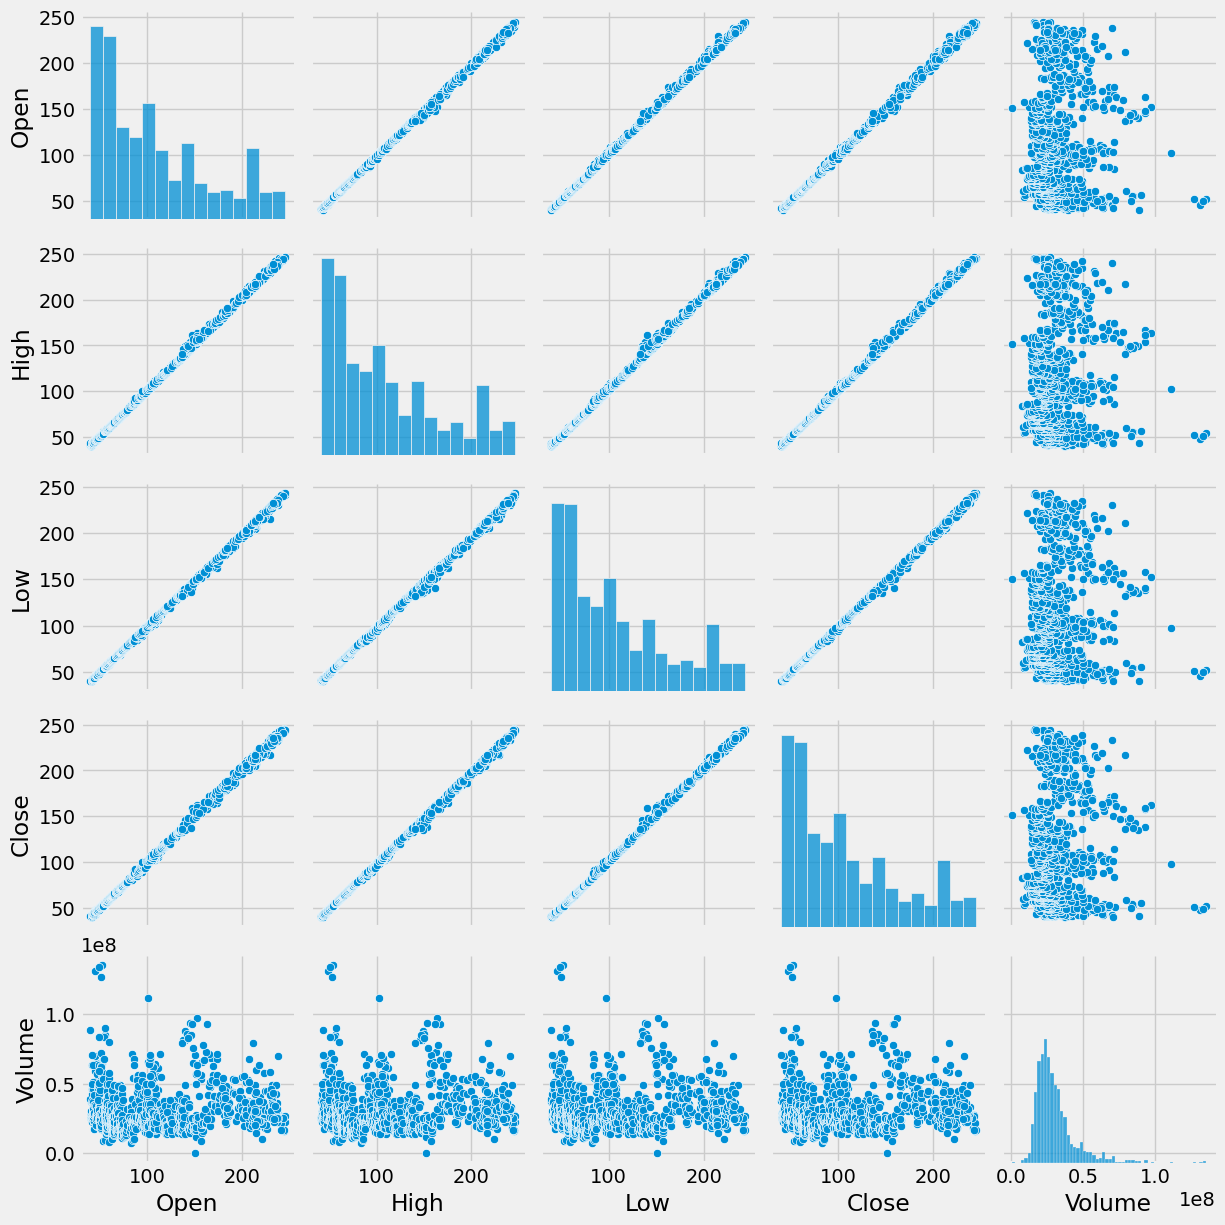

In [ ]:
import seaborn as sns
sns.pairplot(data=Nathan_TS_Monthly_df)

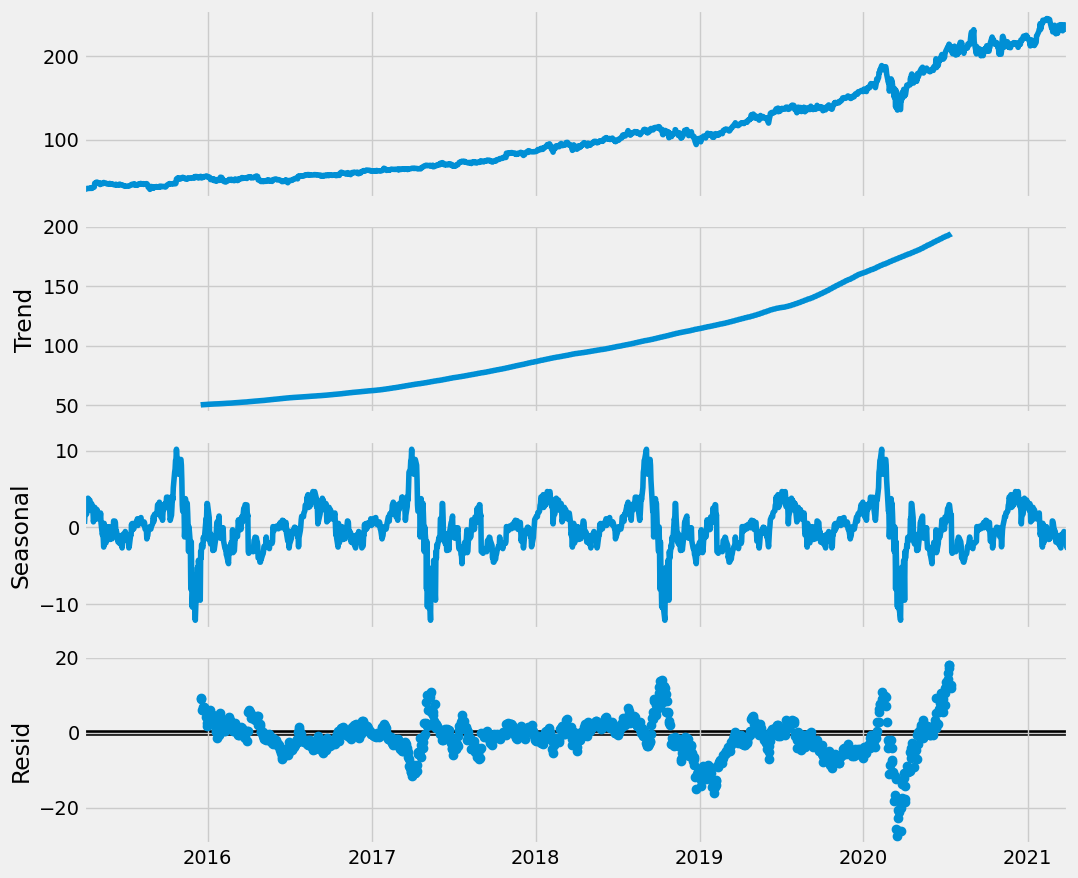

In [ ]:
rcParams['figure.figsize'] = 11, 9
Nathan_pred_df_sim1_new = sm.tsa.seasonal_decompose(Nathan_TS_Monthly_df[['Close']],model='additive',period=360) # The frequncy is annual
Nathan_pred_df_sim2_full = Nathan_TS_Monthly_df[['Close']]
figure = Nathan_pred_df_sim1_new.plot()
plt.show()

In [ ]:
sim1=Nathan_pred_df_sim1_new.resid.dropna()
sim2 = Nathan_pred_df_sim2_full.dropna()
#sim2


#Part3: Now Let's try model

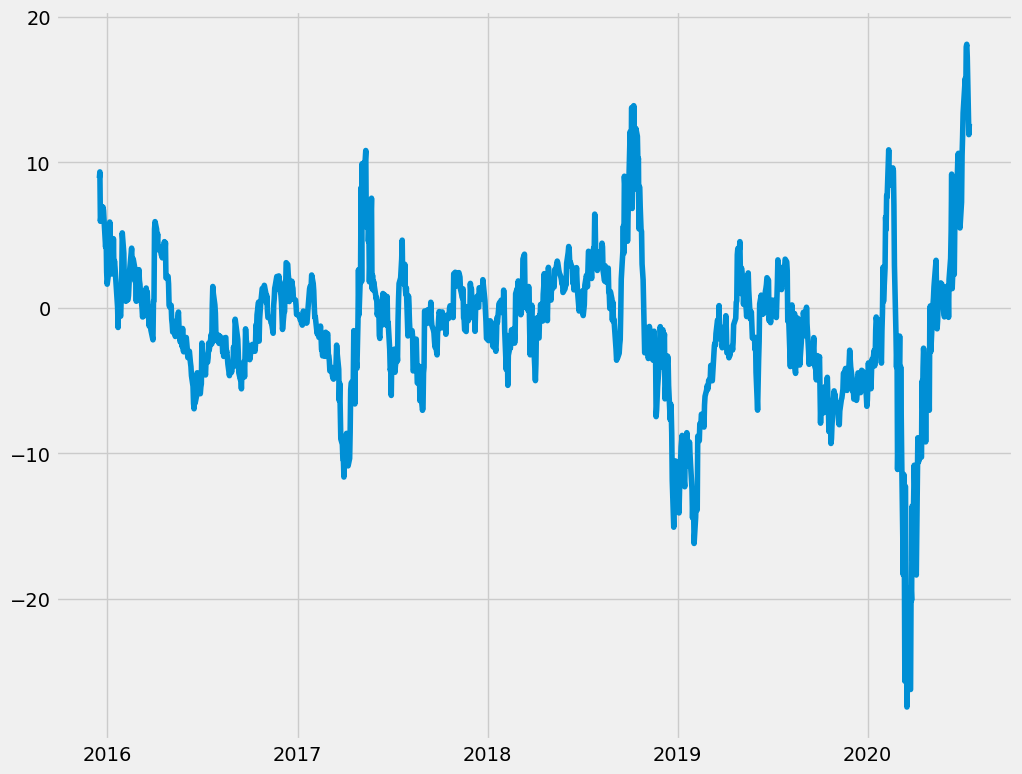

In [ ]:
plt.plot(sim1)

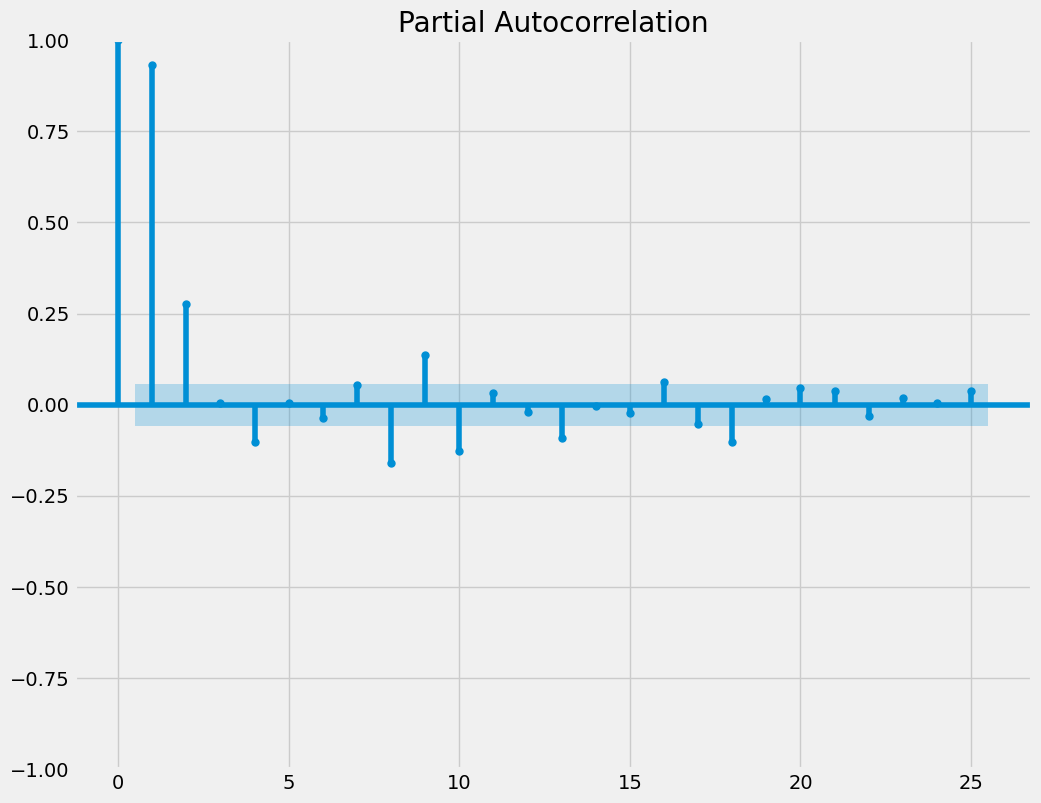

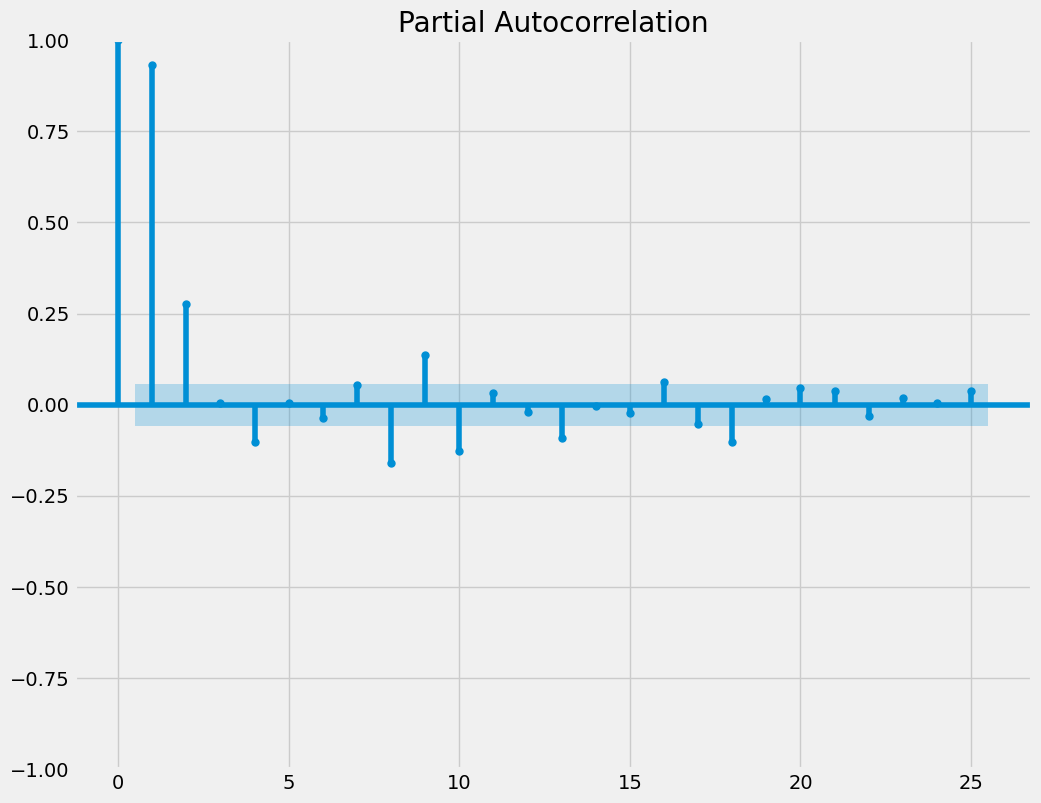

In [ ]:
plot_pacf(sim1, lags=25)

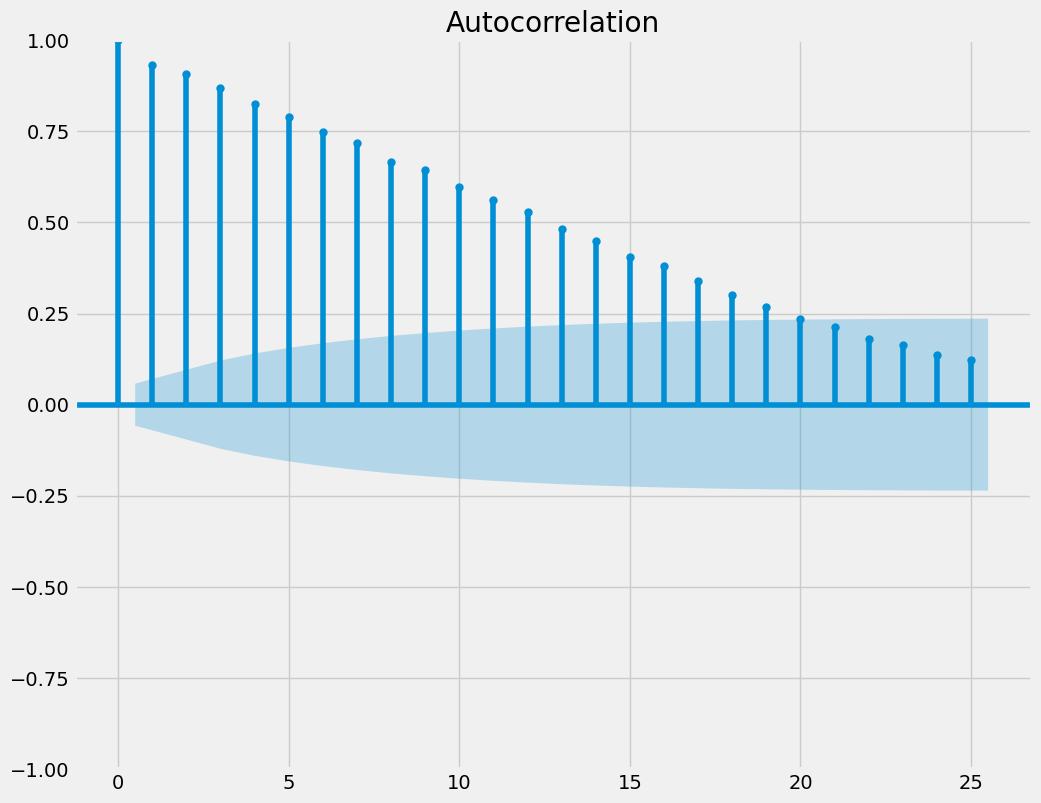

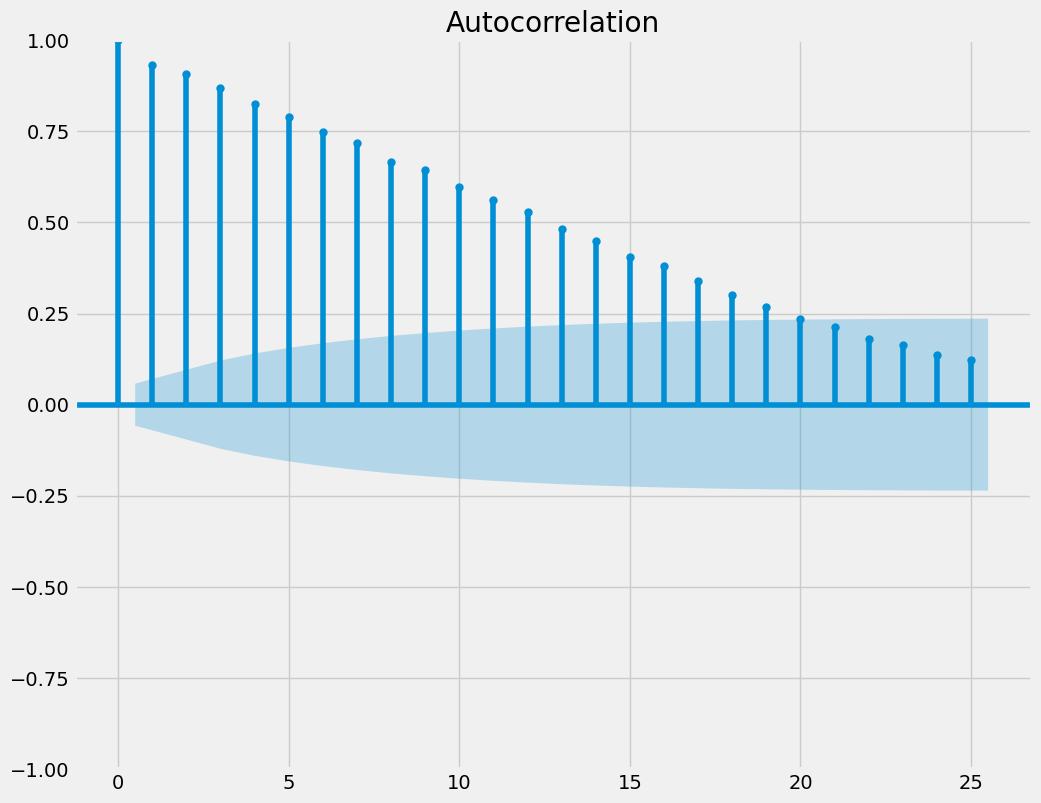

In [ ]:
plot_acf(sim1, lags=25)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 使用 ARIMA(2,0,0) 拟合相当于 ARMA(2,0) 模型
model = ARIMA(sim1, order=(2, 0, 0))
result = model.fit()

# 查看模型结果
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                 1151
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2226.045
Date:                Wed, 25 Sep 2024   AIC                           4460.089
Time:                        23:32:01   BIC                           4480.283
Sample:                             0   HQIC                          4467.712
                               - 1151                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5552      1.221     -0.455      0.649      -2.948       1.838
ar.L1          0.6584      0.013     50.273      0.000       0.633       0.684
ar.L2          0.3031      0.013     22.949      0.0

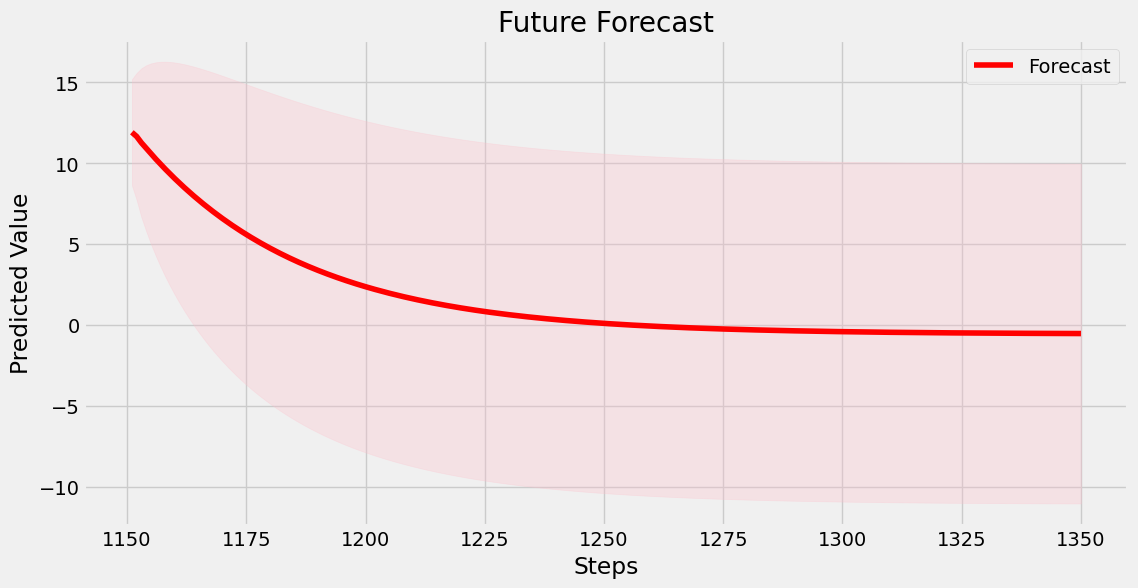

In [ ]:
# Predicting simulated AR(23) model
# 预测未来 200 个数据点
forecast = result.forecast(steps=200)
forecast_ci = result.get_forecast(steps=200).conf_int()
# 绘制预测结果
plt.figure(figsize=(12, 6))
plt.plot(forecast, label='Forecast', color='r')
# 绘制置信区间
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.title('Future Forecast')
plt.xlabel('Steps')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

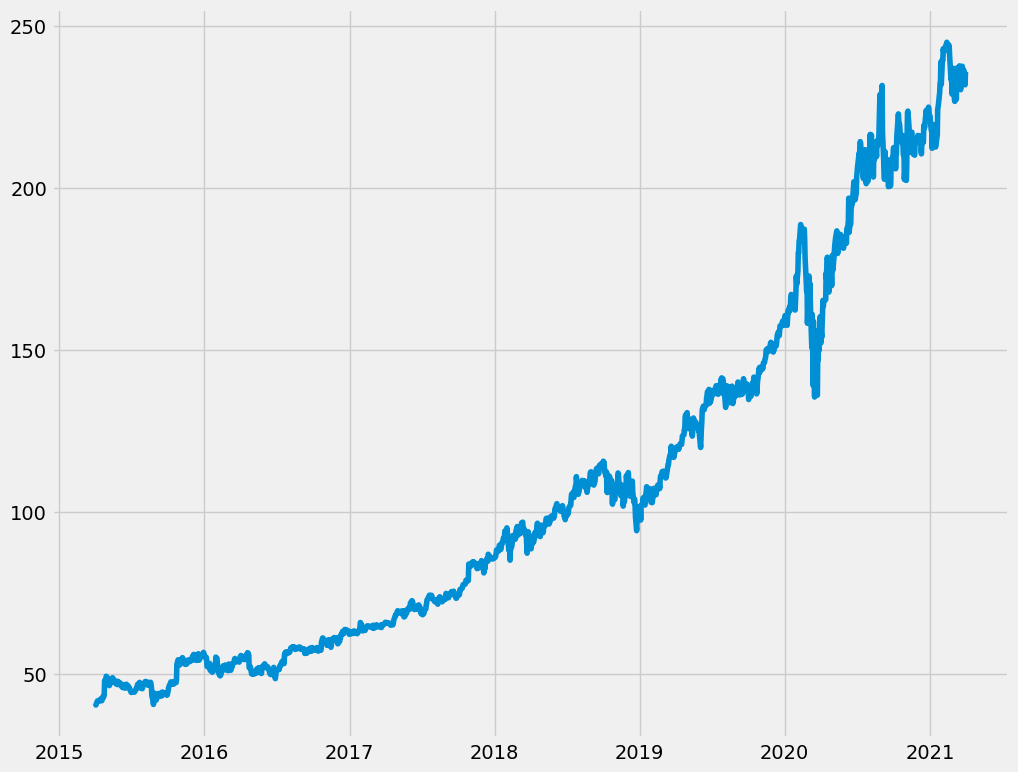

In [ ]:
plt.plot(sim2)

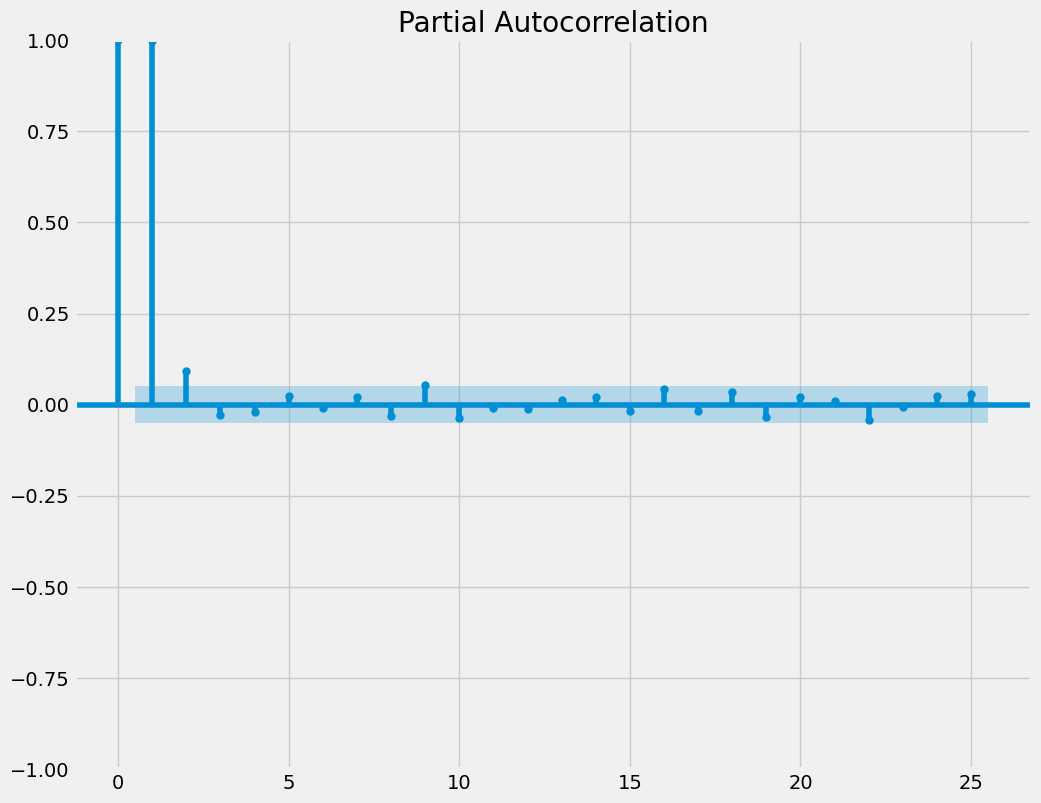

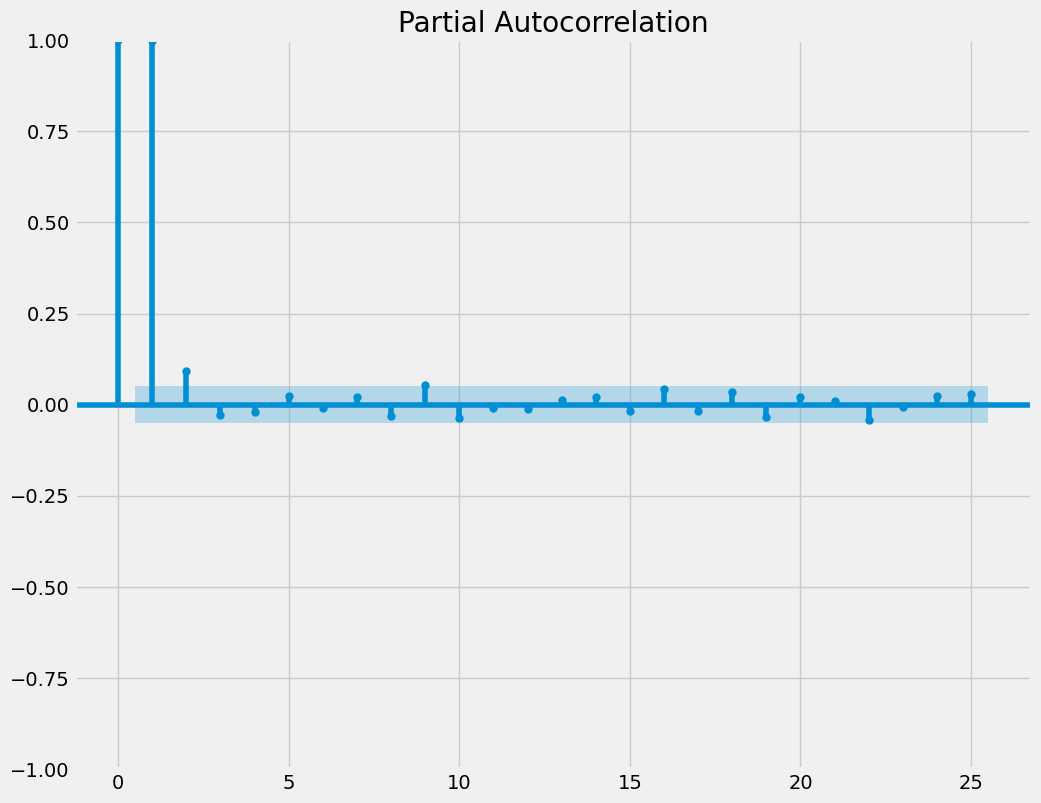

In [ ]:
plot_pacf(sim2, lags=25)

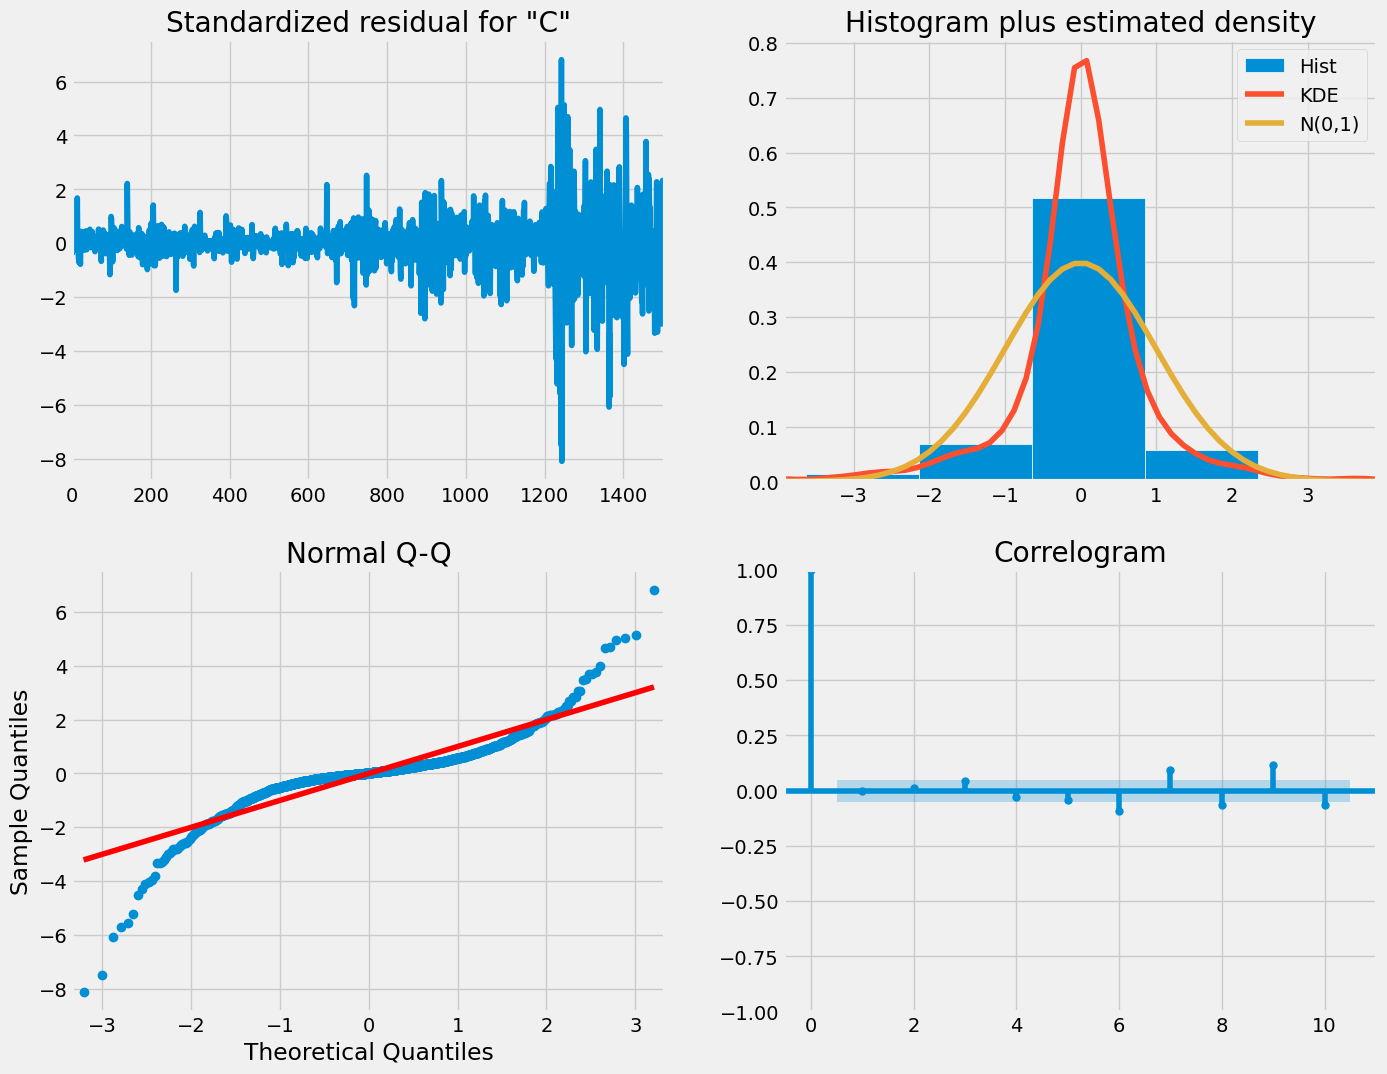

In [ ]:
mod = sm.tsa.statespace.SARIMAX(sim2,
                                order=(2, 3, 2),
				)

MSFTresults = mod.fit()

#print(TSresults.summary().tables[1])

MSFTresults.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
pred = MSFTresults.get_prediction(start=1400, dynamic=False)

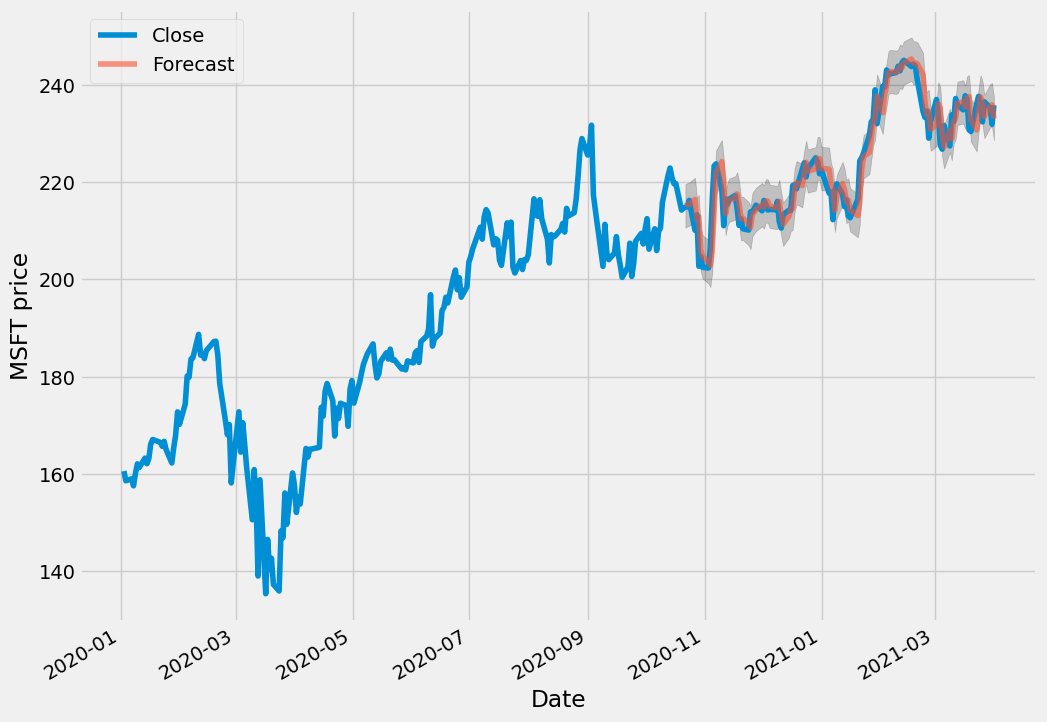

In [ ]:
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters.

ax = sim2['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('MSFT price')
plt.legend()

plt.show()


In [ ]:
pred = MSFTresults.get_prediction(start=1400, dynamic=True)

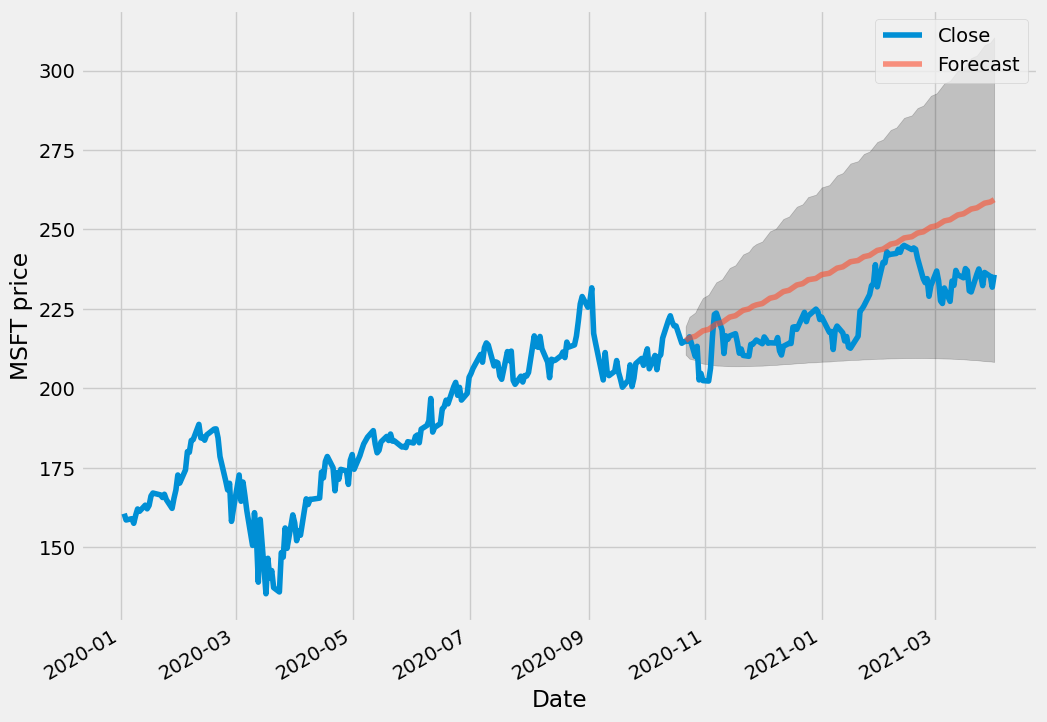

In [ ]:
pred_ci = pred.conf_int()
#Returns the confidence interval of the fitted parameters.

ax = sim2['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('MSFT price')
plt.legend()

plt.show()


# Part 4: Model Evaluation

# Part 5 : Summary